In [11]:
#Naive Bayes Algorithm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#Sample dataset
data={
'Message':[
"Win money now",
"Lowest price ever",
"Hello how are you",
"Can we arrange the meeting tomorrow?",
"Congratulations, you won a lottery"
],
'Label': ['Spam', 'Spam', 'Not spam', 'Not spam', 'Spam']
}
#Converting to dictionary to Dataframe
df=pd.DataFrame (data)
#Converting labels to numeric
df['Label']=df['Label'].map({"Not spam":0, "Spam":1})
x=df['Message'] #Text data
y=df ['Label'] # Target
# print(df)
#Convert the text into numerical features
vectorizer=CountVectorizer() #Convert text into numbers
x_features=vectorizer.fit_transform(x) #fit learns all unique words
#transform converts each sentence into a vector
#Train-Test split
x_train,x_test,y_train,y_test=train_test_split(x_features, y, test_size=0.3, random_state=1)
#print(x_train)
#print(y_train)
#Train Naive Bayes classifler
model=MultinomialNB()
model.fit(x_train,y_train)
#Predeiction
y_pred=model.predict(x_test)
#Test with new emails
new_emails=['Free offer just for you', 'Reminder for the meeting']
new_features=vectorizer.transform(new_emails)
predictions=model.predict(new_features)
for email, p in zip(new_emails, predictions):
    print(f"Email: '{email}'->{'Spam' if p else 'Not spam'}")

Email: 'Free offer just for you'->Spam
Email: 'Reminder for the meeting'->Not spam


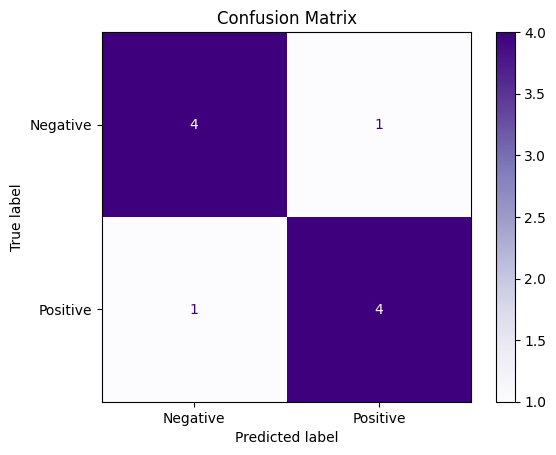

In [17]:
#Evaluation
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Example: -Negative, 1-Positive
y_true=[0,0,1,1,0,1,0,1,1,0]
y_pred=[0,1,1,1,0,0,0,1,1,0]
#Generate confusion matrix
cm=confusion_matrix(y_true,y_pred)
#Display confusion matrix with Labels
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Purples, values_format='d') #d means integer
plt.title('Confusion Matrix')
plt.show()